In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


### Read Data

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
#import seaborn as sns
import pandas as pd
#X=np.load('Y.npy.Z.npz')

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
import numpy as np
train = np.load('train_1.npz')
data = pd.DataFrame(train['data'])
label = pd.DataFrame(train['label'])

In [5]:
train2 = np.load('train_2.npz')
data2 = pd.DataFrame(train2['data'])
label2 = pd.DataFrame(train2['label'])

In [6]:
train3 = np.load('train_3.npz')
data3 = pd.DataFrame(train3['data'])
label3 = pd.DataFrame(train3['label'])

In [7]:
data.shape
data2.shape
data3.shape

(1301, 60000)

(2346, 60000)

(2394, 60000)

### LABELS

In [8]:
labels=pd.DataFrame()
labels=labels.append(label,ignore_index=True)
;
labels.shape

labels=label2.append(labels,ignore_index=True)
labels.shape
;
labels=label3.append(labels,ignore_index=True)
labels.shape
;

''

(1301, 1)

(3647, 1)

''

(6041, 1)

''

### DATA 1

In [9]:
datas=pd.DataFrame()
datas=datas.append(data,ignore_index=True)
;
datas.shape

''

(1301, 60000)

### DATA 2

In [10]:
datas=data2.append(datas,ignore_index=True)
datas.shape
;

(3647, 60000)

''

### DATA 3

In [11]:
datas=data3.append(datas,ignore_index=True)
datas.shape
;

(6041, 60000)

''

In [12]:
datas.head()

,0,1,2,3,4,5,6,7,8,9,...,59990,59991,59992,59993,59994,59995,59996,59997,59998,59999
0,779.500018,12.102906,-230.636047,137.374999,14.124999,-109.749997,45.375001,247.647098,-61.750002,-21.727908,...,-89.124998,-66.750001,165.875001,-47.124999,-25.375000,42.749999,43.625000,17.875000,-75.999999,-172.625000
1,-43.470499,-56.750001,-106.625002,60.750000,130.124998,-142.375001,-11.845500,-203.000000,-76.500000,-125.374999,...,141.750003,-20.125001,47.124998,-46.874998,-70.125000,-7.500000,-98.499999,-0.750001,-5.250000,-43.000000
2,-111.875000,-10.625000,91.750000,-53.125000,82.874999,195.249999,-126.125001,-13.750003,31.374998,25.625000,...,-235.375000,244.057864,-35.625000,-39.000001,228.875004,-82.658571,129.966429,-57.874999,131.249997,4.750000
3,-66.000002,-176.840206,-60.000000,-57.500000,60.250000,-33.375000,-112.000000,130.874998,66.374997,-143.500000,...,73.374997,59.125000,5.250000,-224.499995,26.749998,-143.151759,-12.651759,83.500000,47.999999,9.000000
4,-89.875000,-229.625002,-166.249995,-351.999989,-234.624999,-311.500021,-128.374992,-220.750006,23.835656,-128.539345,...,18.472188,216.472189,-193.500000,254.749998,-109.874993,-11.250000,75.125000,162.500002,-25.500000,40.874999


### convert binary to integer

In [13]:
labels=pd.Series(np.ravel(labels.astype(int)))
labels.shape

(6041,)

In [14]:
labels.shape
datas.shape

(6041,)

(6041, 60000)

### PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5000)
components=5000
pca.fit(datas)
# Print the components and the amount of variance in the data contained in each dimension
#print( 'PCA components:\n{}'.format(pca.components_[:,0]))
type(pca.components_[:,0])
#print(' PCA explained variance ratio:\n{}'.format(pca.explained_variance_ratio_[:4]*100))

### Looking at Explained Variance (for components=components)

<Container object of 5000 artists>

(0, 1.05)

([<matplotlib.axis.XTick at 0x7fc0f5c68890>,
 <a list of 4 Text xticklabel objects>)

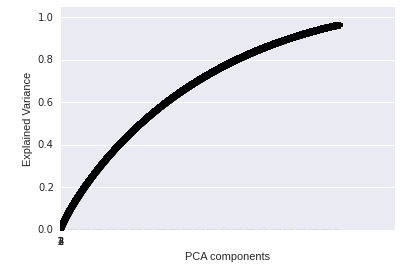

In [151]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
components=5000

%matplotlib inline


# create an x-axis variable for each pca component
x = np.arange(1,components+1)

# plot the cumulative variance
plt.plot(x, np.cumsum(pca.explained_variance_ratio_[0:components]), '-o', color='black')

# plot the components' variance
plt.bar(x, pca.explained_variance_ratio_[0:components], align='center', alpha=0.5)

# plot styling
plt.ylim(0, 1.05)
#plt.annotate('Cumulative\nexplained\nvariance',
 #            xy=(3.7, .88), arrowprops=dict(arrowstyle='->'), xytext=(4.5, .6))
for i,j in zip(x, np.cumsum(pca.explained_variance_ratio_[0:4])):
    plt.annotate(str(j.round(2)),xy=(i+.2,j-.02))
plt.xticks(range(1,5))
#plt.yticks(range(0,5000))
plt.xlabel('PCA components')
plt.ylabel('Explained Variance')
plt.show()

### Transform Data

In [ ]:
data_p=pd.DataFrame(pca.transform(datas))

In [ ]:
data_p.shape
label_p=labels

### Ratio of seizure: not seizure

In [32]:
#label.columns=['label']
labels.value_counts()

0    5592
1     449
dtype: int64

### holding out 5000:6041

In [33]:
data_h=data_p.iloc[:5000]
label_h=labels.iloc[:5000]

In [34]:
data_h.shape
label_h.shape

(5000, 5000)

(5000,)

### getting all seizure values

In [35]:
indexT=label_h==1
indexF=label_h==0

### Oversampling (change value of n to desired value)

In [36]:
## seizure= No
import random
num = 4000 #number of samples
data_os1 = data_h[indexF].loc[random.sample(list(data_h[indexF].index),num)]
label_h[data_os1.index].value_counts()

0    4000
dtype: int64

### oversampling underepresented class

In [37]:
#seizure==Yes
rows = np.random.choice(data_h[indexT].index.values, 4000)
data_os2 =pd.DataFrame(data_h.ix[rows])
label_h[data_os2.index].value_counts()

1    4000
dtype: int64

### combine 2 data frames

In [38]:
data_train=data_os1.append(data_os2) 
;
data.shape

''

(1301, 60000)

### Appropriate labels for data

In [39]:
label_train=pd.Series()
label_train=pd.Series(0,index=np.arange(4000)) 
label_train=label_train.append(pd.Series(1,index=np.arange(4000))) 

In [40]:
label_train.value_counts()

1    4000
0    4000
dtype: int64

In [41]:
data_train.shape
label_train.shape

(8000, 5000)

(8000,)

### Test data

In [42]:
data_test=data_p[5000:6041]
label_test=label_p[5000:6041]

### all models used

In [48]:
#  Import any additional functionality you may need here
from sklearn import cross_validation
from sklearn.metrics import accuracy_score
from time import time
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# TODO: Import the three supervised learning models from sklearn
# from sklearn import model_A
from sklearn.linear_model import LogisticRegression
# from sklearn import model_B
from sklearn.svm import SVC
# from skearln import model_C
from sklearn.linear_model import SGDClassifier
# from skearln import model_D
from sklearn.ensemble import RandomForestClassifier



### Import metrics
import seaborn as sns
from sklearn import metrics
import pandas as pd
from ggplot import *
from sklearn.metrics import roc_curve, auc

### Initialize models

In [44]:
clf_A = LogisticRegression(n_jobs=-1)
clf_A1 = LogisticRegression(n_jobs=-1)
clf_B = SVC(probability=True)
clf_C = SGDClassifier(loss="hinge", penalty="l2")
clf_D = RandomForestClassifier(n_jobs=-1)

In [45]:
np.any(np.isnan(labels))
np.all(np.isfinite(labels))
np.any(np.isnan(data))
np.all(np.isfinite(data))


False

True

False

True

### Model A

In [46]:
clf_A.fit(data_train, label_train)
y_pred = clf_A.predict(data_test)
LGproba=clf_A.predict_proba(data_test)
print ("ROC score    : {:.4f}.".format(roc_auc_score(np.array(label_test), np.array(LGproba[:,0]))))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

ROC score    : 0.5409.


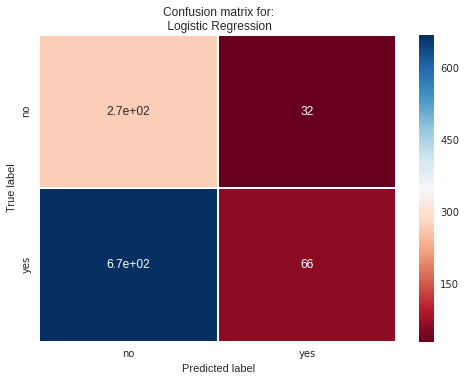

In [49]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for a model
model = clf_A
cm=confusion_matrix(y_pred,label_test)

# view with a heatmap
sns.heatmap(cm, annot=True, cmap='RdBu', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'], linewidth=.5)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for:\n{}'.format(" Logistic Regression"))

 ### ROC   +    CM  confusion matrix

In [63]:
from sklearn.metrics import confusion_matrix
y_pred = clf_A.predict(data_test)
cm=confusion_matrix(y_pred,label_test)
cm

array([[273,  32],
       [670,  66]])

(0.0, 1.0)

(0.0, 1.05)

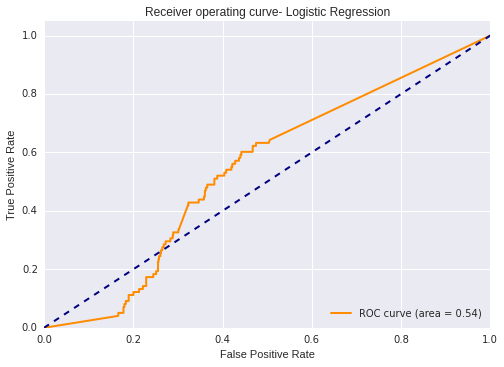

In [65]:
fpr, tpr, _ = roc_curve(label_test, LGproba[:, 0])
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating curve- Logistic Regression')
plt.legend(loc="lower right")
plt.show()

### Model B

In [53]:
clf_B.fit(data_train, label_train)
SVCproba=clf_B.predict_proba(data_test)
print ("ROC score    : {:.4f}.".format(roc_auc_score(np.array(label_test), np.array(SVCproba[:,1]))))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

ROC score    : 0.4697.


### ROC   +    CM

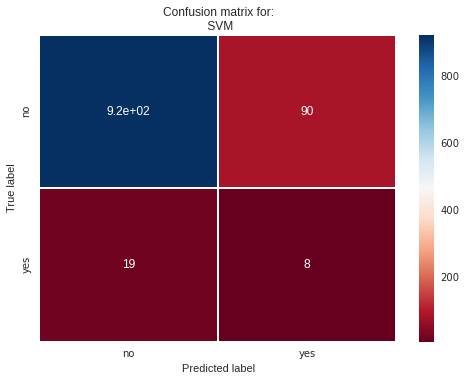

In [61]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for a model
model = clf_B
y_pred = clf_B.predict(data_test)
cm=confusion_matrix(y_pred,label_test)

# view with a heatmap
sns.heatmap(cm, annot=True, cmap='RdBu', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'], linewidth=.5)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for:\n{}'.format(" SVM "))

(0.0, 1.0)

(0.0, 1.05)

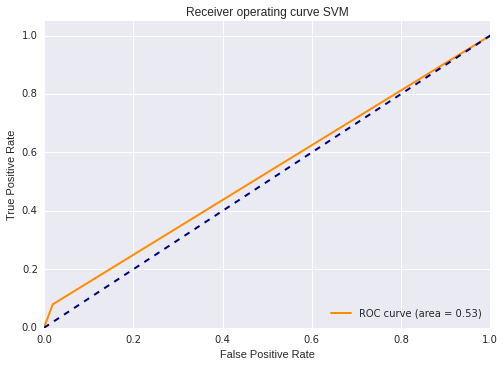

In [62]:
fpr, tpr, _ = roc_curve(label_test, SVCproba[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating curve SVM')
plt.legend(loc="lower right")
plt.show()

### Model C

In [74]:
clf_C = SGDClassifier(loss="log", penalty="l2")
clf_C.fit(data_train, label_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [78]:
SGDproba=clf_C.predict_proba(data_test)
print ("ROC score    : {:.4f}.".format(roc_auc_score(np.array(label_test), np.array(SGDproba[:,0]))))

ROC score    : 0.6212.


(0.0, 1.0)

(0.0, 1.05)

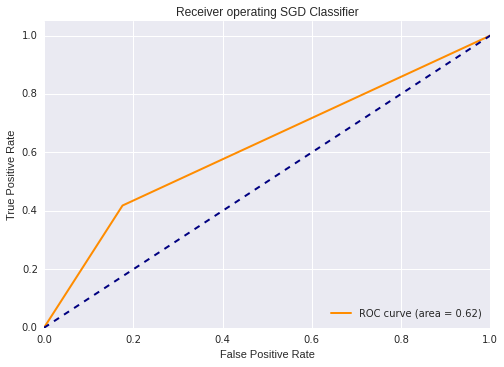

In [80]:
fpr, tpr, _ = roc_curve(label_test, SGDproba[:,0])
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating SGD Classifier')
plt.legend(loc="lower right")
plt.show()

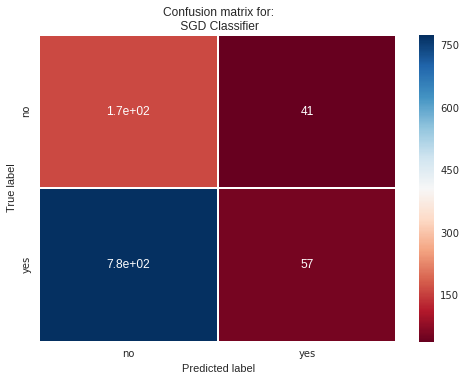

In [81]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for a model
model = clf_C
y_pred = clf_C.predict(data_test)

cm=confusion_matrix(y_pred,label_test)

# view with a heatmap
sns.heatmap(cm, annot=True, cmap='RdBu', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'], linewidth=.5)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for:\n{}'.format(" SGD Classifier "))

### Model D

In [95]:
clf_D.fit(data_train, label_train)
y_pred = clf_D.predict(data_test)
RFproba=clf_D.predict_proba(data_test)
print ("ROC score    : {:.4f}.".format(roc_auc_score(np.array(label_test), np.array(RFproba[:,1]))))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

ROC score    : 0.6869.


### ROC+ CM

(0.0, 1.0)

(0.0, 1.05)

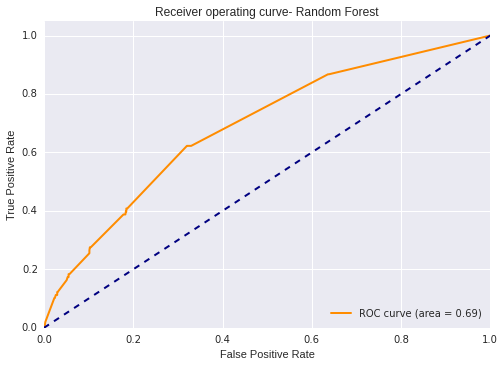

In [96]:
fpr, tpr, _ = roc_curve(label_test, RFproba[:,1])
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating curve- Random Forest')
plt.legend(loc="lower right")
plt.show()

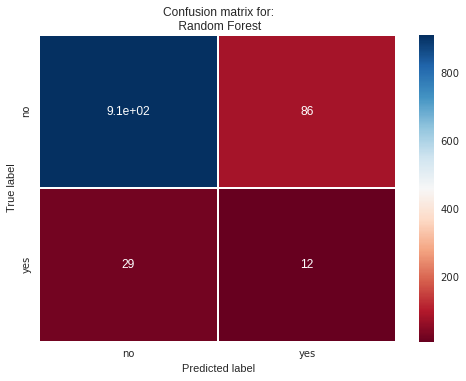

In [97]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for a model
model = clf_D
y_pred = clf_D.predict(data_test)

cm=confusion_matrix(y_pred,label_test)

# view with a heatmap
sns.heatmap(cm, annot=True, cmap='RdBu', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'], linewidth=.5)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for:\n{}'.format(" Random Forest "))

### GRIDSEARCH

In [ ]:
from sklearn import grid_search
from sklearn.linear_model import LogisticRegression


clf_A1=grid_search.GridSearchCV(cv=4,estimator=LogisticRegression(C=1.0,penalty='l2'),
       param_grid={'C':[0.01,1,10,1000]},n_jobs=-1)
clf_A1.fit(data_train,label_train)
print (clf_A1.best_params_)
print (clf_A1.best_score_)
#train_predict(clf_A1, X_train, y_train, X_test, y_test)

In [ ]:
LGproba1=clf_A.predict_proba(data_test)
print ("ROC score    : {:.4f}.".format(roc_auc_score(np.array(label_test), np.array(LGproba1[:,1]))))

In [ ]:
preds = clf_A1.predict_proba(data_test)[:,0]
fpr, tpr, _ = metrics.roc_curve(label_test, preds)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

from sklearn.grid_search import GridSearchCV
clf_B1=SVC(probability=True)
clf_B1.probability = True
param_grids = {"kernel":['rbf'],
               'gamma': [ 1e-4, 1e-5, 1e-6],
               'C': [1,,
               }

clf_B1 = GridSearchCV(SVC(), param_grid= param_grids, cv=10,n_jobs= -1)
clf_B1.fit(data_train,label_train)


In [ ]:
preds = clf_B1.predict(data_test)
cm=confusion_matrix(label_test, preds)
cm

In [ ]:
#pd.merge(data_train,data_test, how='inner')


### Random Forest

In [128]:
# specify parameters and distributions to sample from

#from sklearn.model_selection import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from time import time
from scipy.stats import randint as sp_randint

param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(1, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
clf = RandomForestClassifier(n_estimators=200,n_jobs=-1)

n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(data_train, label_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
#report(random_search.cv_results_)


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params={}, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'bootstrap': [True, False], 'min_samples_leaf': <scipy.stats.distributions.rv_frozen object at 0x7fc05186fed0>, 'min_samples_split': <scipy.stats.distributions.rv_frozen object at 0x7fc0f67a7910>, 'criterion': ['gini', 'entropy'], 'max_features': <scipy.stats.distributions.rv_frozen object at 0x7fc169fab510>, 'max_depth': [3, None]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring=None, verbose=0)

RandomizedSearchCV took 333.57 seconds for 20 candidates parameter settings.


In [129]:
y_pred = random_search.predict(data_test)
RFprobaR=random_search.predict_proba(data_test)
print ("ROC score    : {:.4f}.".format(roc_auc_score(np.array(label_test), np.array(RFprobaR[:,1]))))

ROC score    : 0.7466.


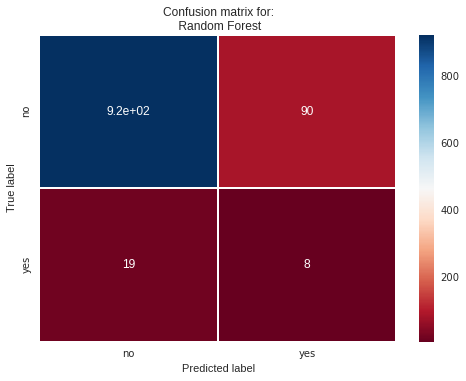

In [132]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for a model
cm=confusion_matrix(y_pred,label_test)

# view with a heatmap
sns.heatmap(cm, annot=True, cmap='RdBu', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'], linewidth=.5)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for:\n{}'.format(" Random Forest "))

(0.0, 1.0)

(0.0, 1.05)

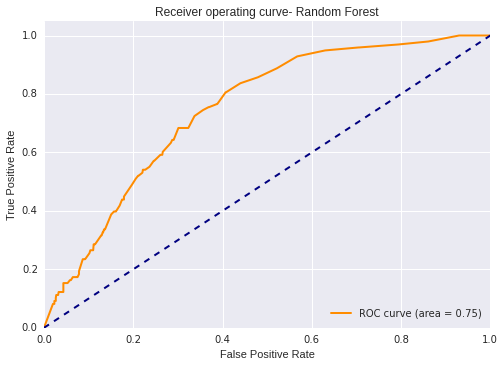

In [133]:
fpr, tpr, _ = roc_curve(label_test, RFprobaR[:,1])
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating curve- Random Forest')
plt.legend(loc="lower right")
plt.show()

In [ ]:
##GRIDSEARCH

In [136]:
# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [1, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
 
              "criterion": ["gini", "entropy"]}
from sklearn.grid_search import GridSearchCV

# run grid search
clf = RandomForestClassifier(n_estimators=200,n_jobs=-1)
grid_search = GridSearchCV(clf, param_grid=param_grid)
start = time()
grid_search.fit(data_train, label_train)


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'bootstrap': [True, False], 'min_samples_leaf': [1, 3, 10], 'min_samples_split': [1, 3, 10], 'criterion': ['gini', 'entropy'], 'max_features': [1, 3, 10], 'max_depth': [3, None]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [138]:
print("GRIDSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))

GRIDSearchCV took 1460.90 seconds for 20 candidates parameter settings.


In [140]:
y_pred = grid_search.predict(data_test)
RFprobaG=grid_search.predict_proba(data_test)
print ("ROC score    : {:.4f}.".format(roc_auc_score(np.array(label_test), np.array(RFprobaG[:,1]))))

ROC score    : 0.7394.


(0.0, 1.0)

(0.0, 1.05)

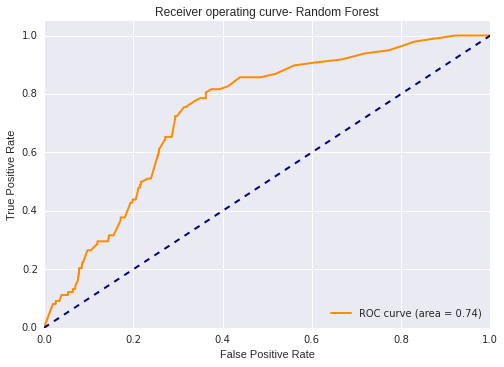

In [142]:
fpr, tpr, _ = roc_curve(label_test, RFprobaG[:,1])
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating curve- Random Forest')
plt.legend(loc="lower right")
plt.show()

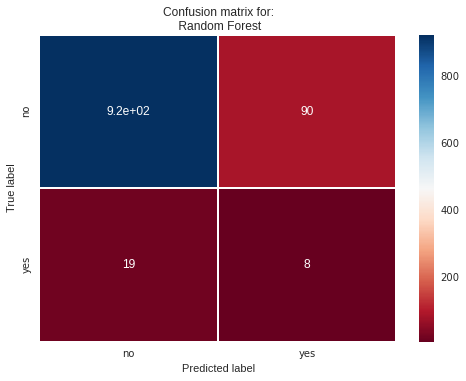

In [143]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for a model
cm=confusion_matrix(y_pred,label_test)

# view with a heatmap
sns.heatmap(cm, annot=True, cmap='RdBu', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'], linewidth=.5)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for:\n{}'.format(" Random Forest "))

### TESTING

In [82]:
test1 = np.load('test_1.npz')
data1 = pd.DataFrame(test1['data'])

In [83]:
test2 = np.load('test_2.npz')
data2 = pd.DataFrame(test2['data'])

In [84]:
test3 = np.load('test_3.npz')
data3 = pd.DataFrame(test3['data'])

In [85]:
data_t1=pca.transform(data1)

In [86]:
data_t2=pca.transform(data2)

In [87]:
data_t3=pca.transform(data3)

In [88]:
data_t1.shape
data_t2.shape
data_t3.shape

(1584, 5000)

(2256, 5000)

(2286, 5000)

In [144]:
RFproba1=random_search.predict_proba(data_t1)
RFproba2=random_search.predict_proba(data_t2)
RFproba3=random_search.predict_proba(data_t3)

In [145]:
np.array(RFproba[:,1])

array([ 0.        ,  0.4       ,  0.1       , ...,  0.2       ,
        0.        ,  0.56724138])

In [146]:
RFproba1.shape[0]+RFproba2.shape[0]+RFproba3.shape[0]

6126

In [147]:
y=pd.DataFrame(np.array(RFproba1[:,1])).append(pd.DataFrame(np.array(RFproba2[:,1]))).append(pd.DataFrame(np.array(RFproba3[:,1])))

In [148]:
y.shape

(6126, 1)

In [149]:
RFproba3[1:10,1]

array([ 0.075    ,  0.125    ,  0.1534375,  0.12     ,  0.125    ,
        0.065    ,  0.125    ,  0.085    ,  0.1934375])

In [1]:
y.to_csv("result.csv")

NameError: name 'y' is not defined